# Target Backends

## Set target

Two options to set the target:

1. Define the target when running the program:
```bash
python3 program.py [...] --target <target_name>
```

2. Target can be defined in the application code:
`cudaq.set_target("target_name")` . Then, to run the program, drop the target flag:
`python3 program.py [...]`


## Target name

1. State vector simulators:
    - Single-GPU (Default if an NVIDIA GPU and CUDA runtime libraries are available): `python3 program.py [...] --target nvidia`
    - Multi-GPUs: `mpirun -np 2 python3 program.py [...] --target nvidia --target-option=mgpu`
2. Tensor network simulator:
    - Single-GPU: `python3 program.py [...] --target tensornet`
    - Multi-GPUs: `mpirun -np 2 python3 program.py [...] --target tensornet`
3. Matrix Product State:
    - Only supports single-GPU simulation: `python3 program.py [...] --target tensornet-mps`
4. NVIDIA Quantum Cloud
    - Run any of the above backends using NVIDIA-provided cloud GPUs (early access only). To learn more, visit [this page](https://www.nvidia.com/en-us/solutions/quantum-computing/cloud/).
    - E.g. `cudaq.set_target('nvqc', backend='tensornet')`
5. Quantum hardware backend (to learn more, visit [this page](https://nvidia.github.io/cuda-quantum/latest/using/backends/hardware.html)):
    - ```cudaq.set_target('QPU_name')```. QPU_name could be `ionq`, `quantinuum`, `iqm`, `oqc`, ...etc.


To learn more about CUDA-Q backends, visit [this page](https://nvidia.github.io/cuda-quantum/latest/using/backends/backends.html)

In [1]:
import cudaq
from time import perf_counter

In [2]:
@cudaq.kernel
def ghz(n: int):
    q = cudaq.qvector(n)
    h(q[0])

    for i in range(1, n):
        cx(q[0], q[i])

In [3]:
# Run with CPU

cudaq.set_target("qpp-cpu")

counts = cudaq.sample(ghz, 10)
print(counts)

{ 1111111111:496 0000000000:504 }



Statevector simulation tiem scales exponentially.

In [4]:
cudaq.set_target("qpp-cpu")

cpu_times = []
for n in range(10, 22):
    start = perf_counter()
    counts = cudaq.sample(ghz, n)
    end = perf_counter()
    cpu_times.append((n, end - start))

print(cpu_times)

[(10, 0.09788946434855461), (11, 0.10975595563650131), (12, 0.03964484576135874), (13, 0.02525443211197853), (14, 0.028187631629407406), (15, 0.030456267297267914), (16, 0.0347348116338253), (17, 0.047350578010082245), (18, 0.10113332327455282), (19, 0.22217136342078447), (20, 0.5346931079402566), (21, 1.1804526932537556)]


Simulation with GPU is also exponential, but faster than CPUs for large number of qubits:

In [5]:
# Use GPU
cudaq.set_target("nvidia")

gpu_times = []
for n in range(10, 32):
    start = perf_counter()
    counts = cudaq.sample(ghz, n)
    end = perf_counter()
    gpu_times.append((n, end - start))

print(gpu_times)

[(10, 0.10216688830405474), (11, 0.0027227941900491714), (12, 0.0009420067071914673), (13, 0.0011568516492843628), (14, 0.001135542057454586), (15, 0.000980764627456665), (16, 0.0011793849989771843), (17, 0.001230638474225998), (18, 0.0021179616451263428), (19, 0.0016564559191465378), (20, 0.0015745339915156364), (21, 0.001733250916004181), (22, 0.0022464729845523834), (23, 0.002961445599794388), (24, 0.004626797512173653), (25, 0.008819160982966423), (26, 0.016355961561203003), (27, 0.031527877785265446), (28, 0.061854041181504726), (29, 0.136078336276114), (30, 0.2727607237175107), (31, 0.7498544650152326)]


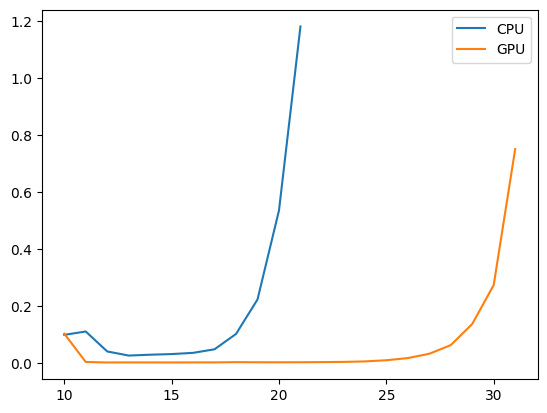

In [7]:
# Visualize
import matplotlib.pyplot as plt

plt.plot([i[0] for i in cpu_times], ([i[1] for i in cpu_times]), label="CPU")
plt.plot([i[0] for i in gpu_times], ([i[1] for i in gpu_times]), label="GPU")
plt.legend()
plt.show()

In [8]:
### Version information
print(cudaq.__version__)

CUDA-Q Version 0.8.0 (https://github.com/NVIDIA/cuda-quantum 5f63a898a1c4af1affd293fcc86220b683436f57)
